<a href="https://colab.research.google.com/github/pushparani7/OIBSIP_Datascience_3/blob/main/Car_pred(oasis_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **STEP 1: LOAD AND EXPLORE DATA (EDA - Exploratory Data Analysis)**

In [ ]:
df = pd.read_csv('/content/car data.csv')
print("\n✓ Dataset shape:", df.shape)
print("\n✓ First few rows:")
print(df.head())

print("\n✓ Dataset Info:")
print(df.info())

print("\n✓ Statistical Summary:")
print(df.describe())

print("\n✓ Missing Values:")
print(df.isnull().sum())


✓ Dataset shape: (301, 9)

✓ First few rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

✓ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2

# **STEP 2: DATA VISUALIZATION**

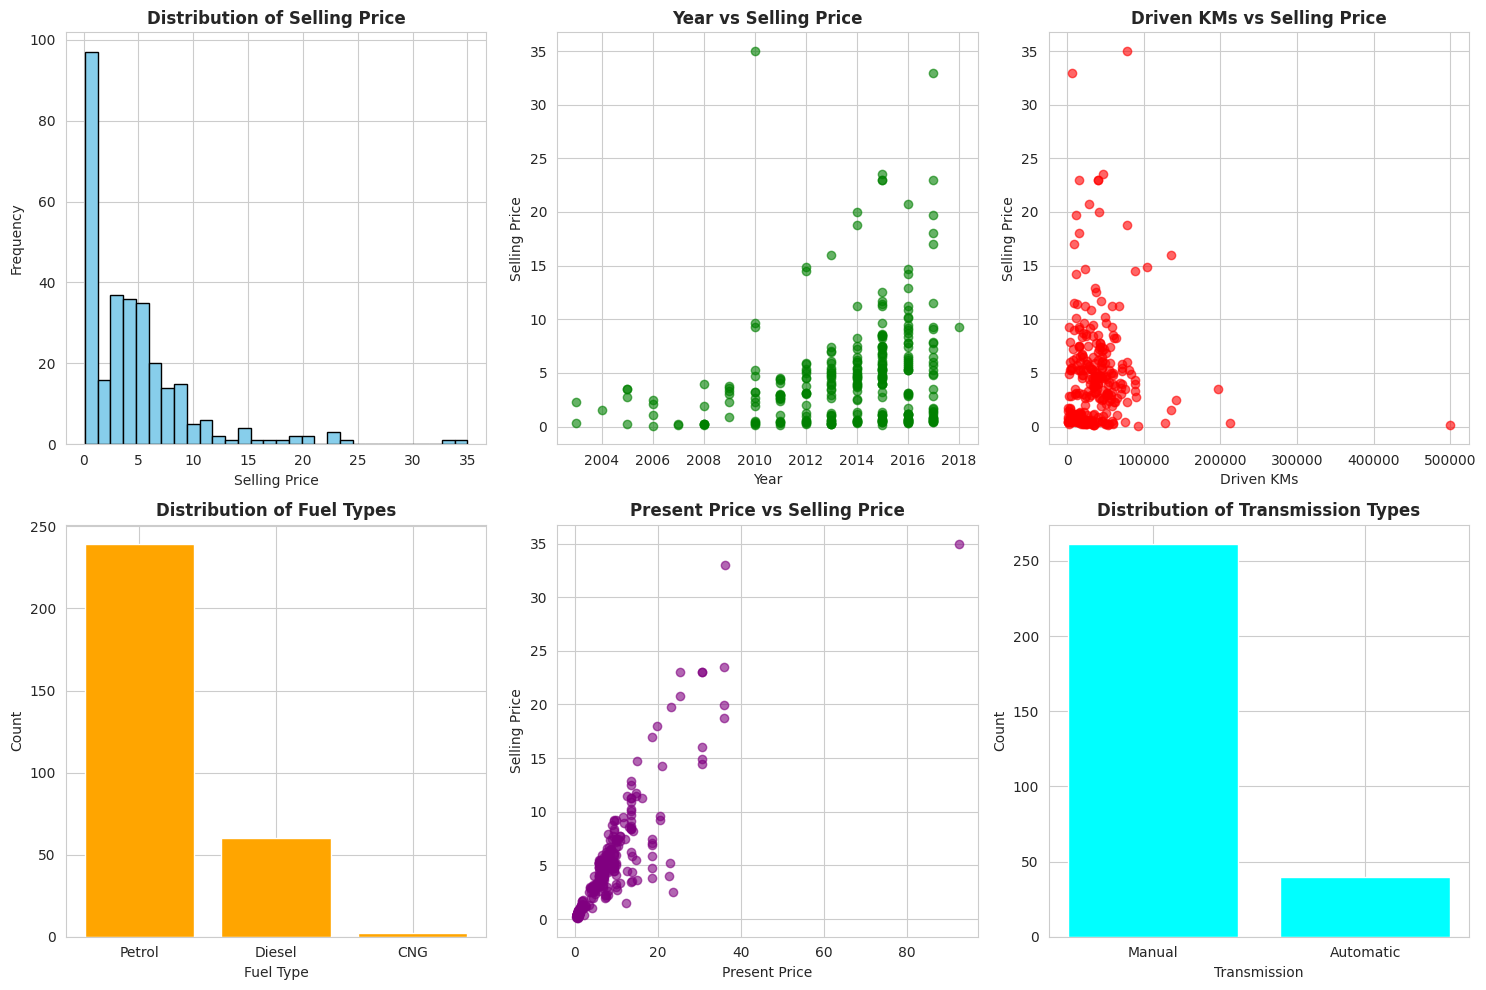

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Distribution of Selling Price (Target Variable)
axes[0, 0].hist(df['Selling_Price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Selling Price', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Selling Price')
axes[0, 0].set_ylabel('Frequency')

# Relationship: Year vs Selling Price
axes[0, 1].scatter(df['Year'], df['Selling_Price'], alpha=0.6, color='green')
axes[0, 1].set_title('Year vs Selling Price', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Selling Price')

# Relationship: Driven KMs vs Selling Price
axes[0, 2].scatter(df['Driven_kms'], df['Selling_Price'], alpha=0.6, color='red')
axes[0, 2].set_title('Driven KMs vs Selling Price', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Driven KMs')
axes[0, 2].set_ylabel('Selling Price')

# Fuel Type distribution
axes[1, 0].bar(df['Fuel_Type'].value_counts().index, df['Fuel_Type'].value_counts().values, color='orange')
axes[1, 0].set_title('Distribution of Fuel Types', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Fuel Type')
axes[1, 0].set_ylabel('Count')

# Present Price vs Selling Price (strongest relationship expected)
axes[1, 1].scatter(df['Present_Price'], df['Selling_Price'], alpha=0.6, color='purple')
axes[1, 1].set_title('Present Price vs Selling Price', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Present Price')
axes[1, 1].set_ylabel('Selling Price')

# Transmission distribution
axes[1, 2].bar(df['Transmission'].value_counts().index, df['Transmission'].value_counts().values, color='cyan')
axes[1, 2].set_title('Distribution of Transmission Types', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Transmission')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# **STEP 3: DATA PREPROCESSING**

In [ ]:
df_clean = df.copy()

# Handle categorical variables (Encode them to numbers)
print("\n✓ Encoding categorical variables...")

# Fuel Type: Convert to numerical
fuel_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
df_clean['Fuel_Type'] = df_clean['Fuel_Type'].map(fuel_mapping)

# Selling Type: Convert to numerical
selling_mapping = {'Individual': 0, 'Dealer': 1}
df_clean['Selling_type'] = df_clean['Selling_type'].map(selling_mapping)

# Transmission: Convert to numerical
transmission_mapping = {'Manual': 0, 'Automatic': 1}
df_clean['Transmission'] = df_clean['Transmission'].map(transmission_mapping)

# Drop Car_Name (not useful for prediction)
df_clean = df_clean.drop('Car_Name', axis=1)

print("✓ Categorical encoding complete")
print("\nProcessed data:")
print(df_clean.head())



✓ Encoding categorical variables...
✓ Categorical encoding complete

Processed data:
   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0  2014           3.35           5.59       27000          0             1   
1  2013           4.75           9.54       43000          1             1   
2  2017           7.25           9.85        6900          0             1   
3  2011           2.85           4.15        5200          0             1   
4  2014           4.60           6.87       42450          1             1   

   Transmission  Owner  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0  


# **STEP 4: FEATURE SELECTION AND SPLITTING DATA**

In [ ]:
X = df_clean.drop('Selling_Price', axis=1)
y = df_clean['Selling_Price']

print(f"\n✓ Features (X): {list(X.columns)}")
print(f"✓ Target (y): Selling_Price")

# Split data into training (80%) and testing (20%) sets
# WHY: Training set teaches the model, testing set evaluates its real-world performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n✓ Training set size: {X_train.shape[0]} samples")
print(f"✓ Testing set size: {X_test.shape[0]} samples")

# Scale features to improve model performance
# WHY: Scaling ensures all features contribute equally and helps gradient-based algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled (standardized)")


✓ Features (X): ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
✓ Target (y): Selling_Price

✓ Training set size: 240 samples
✓ Testing set size: 61 samples
✓ Features scaled (standardized)


# **STEP 5: TRAIN MULTIPLE MODELS AND COMPARE**

In [ ]:
models = {}
results = {}

# MODEL 1: LINEAR REGRESSION
# WHY: Baseline model, simple, fast, interpretable. Good for understanding relationships.
print("\n1️⃣  LINEAR REGRESSION")
print("   Why? Simple baseline model. Shows if variables have linear relationship with price.")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
models['Linear Regression'] = lr
results['Linear Regression'] = {
    'r2': r2_score(y_test, y_pred_lr),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'mae': mean_absolute_error(y_test, y_pred_lr),
    'predictions': y_pred_lr
}
print(f"   R² Score: {results['Linear Regression']['r2']:.4f}")
print(f"   RMSE: {results['Linear Regression']['rmse']:.4f}")

# MODEL 2: DECISION TREE
# WHY: Captures non-linear patterns. Can identify complex relationships between features.
print("\n2️⃣  DECISION TREE REGRESSOR")
print("   Why? Captures non-linear relationships. Easy to interpret feature importance.")
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)  # Note: Decision trees don't need scaling
y_pred_dt = dt.predict(X_test)
models['Decision Tree'] = dt
results['Decision Tree'] = {
    'r2': r2_score(y_test, y_pred_dt),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'mae': mean_absolute_error(y_test, y_pred_dt),
    'predictions': y_pred_dt
}
print(f"   R² Score: {results['Decision Tree']['r2']:.4f}")
print(f"   RMSE: {results['Decision Tree']['rmse']:.4f}")

# MODEL 3: RANDOM FOREST
# WHY: Multiple decision trees reduce overfitting. Better generalization. Handles non-linearity.
print("\n3️⃣  RANDOM FOREST REGRESSOR")
print("   Why? Ensemble of trees reduces overfitting. Better accuracy than single tree.")
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
models['Random Forest'] = rf
results['Random Forest'] = {
    'r2': r2_score(y_test, y_pred_rf),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'mae': mean_absolute_error(y_test, y_pred_rf),
    'predictions': y_pred_rf
}
print(f"   R² Score: {results['Random Forest']['r2']:.4f}")
print(f"   RMSE: {results['Random Forest']['rmse']:.4f}")

# MODEL 4: GRADIENT BOOSTING
# WHY: Sequentially improves predictions. Often the best performance. Strong on complex data.
print("\n4️⃣  GRADIENT BOOSTING REGRESSOR")
print("   Why? Combines trees sequentially to reduce errors. Usually best performance.")
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
models['Gradient Boosting'] = gb
results['Gradient Boosting'] = {
    'r2': r2_score(y_test, y_pred_gb),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    'mae': mean_absolute_error(y_test, y_pred_gb),
    'predictions': y_pred_gb
}
print(f"   R² Score: {results['Gradient Boosting']['r2']:.4f}")
print(f"   RMSE: {results['Gradient Boosting']['rmse']:.4f}")



1️⃣  LINEAR REGRESSION
   Why? Simple baseline model. Shows if variables have linear relationship with price.
   R² Score: 0.8467
   RMSE: 1.8792

2️⃣  DECISION TREE REGRESSOR
   Why? Captures non-linear relationships. Easy to interpret feature importance.
   R² Score: 0.9349
   RMSE: 1.2244

3️⃣  RANDOM FOREST REGRESSOR
   Why? Ensemble of trees reduces overfitting. Better accuracy than single tree.
   R² Score: 0.9626
   RMSE: 0.9284

4️⃣  GRADIENT BOOSTING REGRESSOR
   Why? Combines trees sequentially to reduce errors. Usually best performance.
   R² Score: 0.9649
   RMSE: 0.8991


# **STEP 6: MODEL COMPARISON AND RESULTS**


            Model  R² Score     RMSE      MAE
Linear Regression  0.846690 1.879250 1.221932
    Decision Tree  0.934918 1.224415 0.782705
    Random Forest  0.962585 0.928371 0.621502
Gradient Boosting  0.964906 0.899115 0.550186

🏆 BEST MODEL: Gradient Boosting


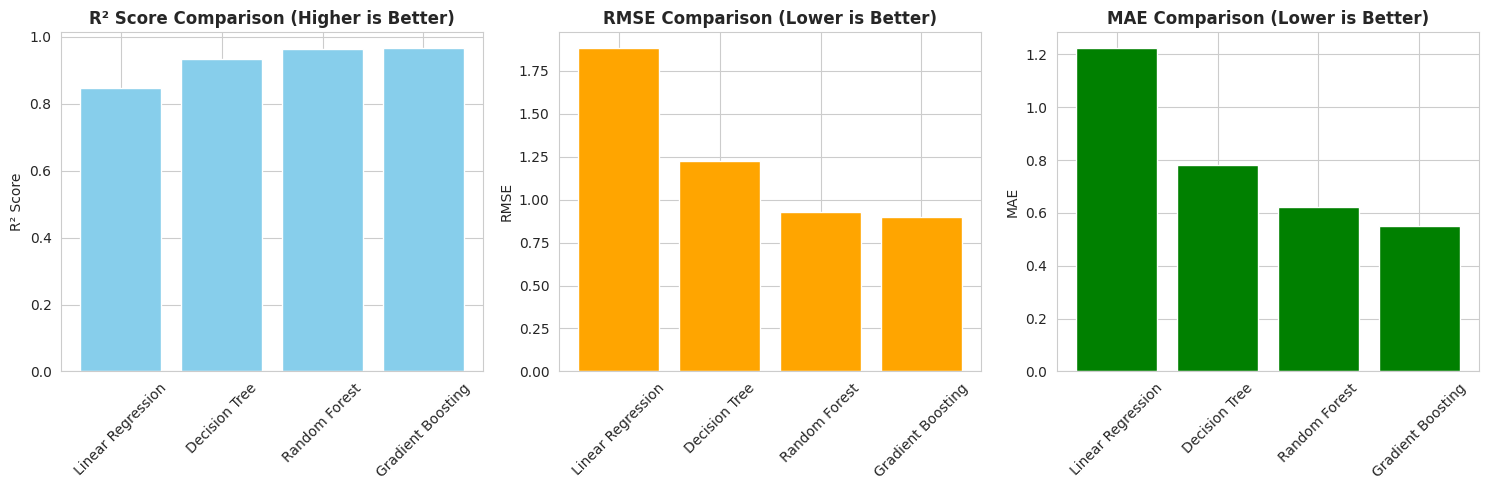

In [ ]:
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'R² Score': [results[m]['r2'] for m in results.keys()],
    'RMSE': [results[m]['rmse'] for m in results.keys()],
    'MAE': [results[m]['mae'] for m in results.keys()]
})

print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(comparison_df['Model'], comparison_df['R² Score'], color='skyblue')
axes[0].set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(comparison_df['Model'], comparison_df['RMSE'], color='orange')
axes[1].set_title('RMSE Comparison (Lower is Better)', fontweight='bold')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(comparison_df['Model'], comparison_df['MAE'], color='green')
axes[2].set_title('MAE Comparison (Lower is Better)', fontweight='bold')
axes[2].set_ylabel('MAE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **STEP 7: FEATURE IMPORTANCE (Best Model)**


✓ Feature Importance (Top 5):
         Feature  Importance
1  Present_Price    0.898041
0           Year    0.071259
2     Driven_kms    0.020419
3      Fuel_Type    0.006042
5   Transmission    0.004096


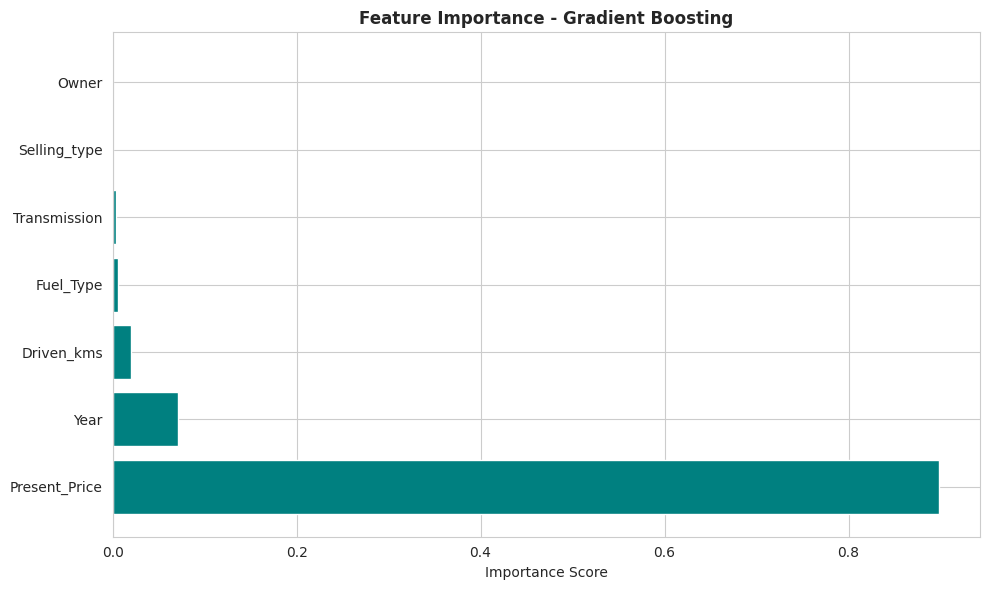

In [ ]:
best_model = models[best_model_name]
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n✓ Feature Importance (Top 5):")
    print(feature_importance.head())

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance Score')
    plt.title(f'Feature Importance - {best_model_name}', fontweight='bold')
    plt.tight_layout()
    plt.show()

# **STEP 8: ACTUAL vs PREDICTED VISUALIZATION**

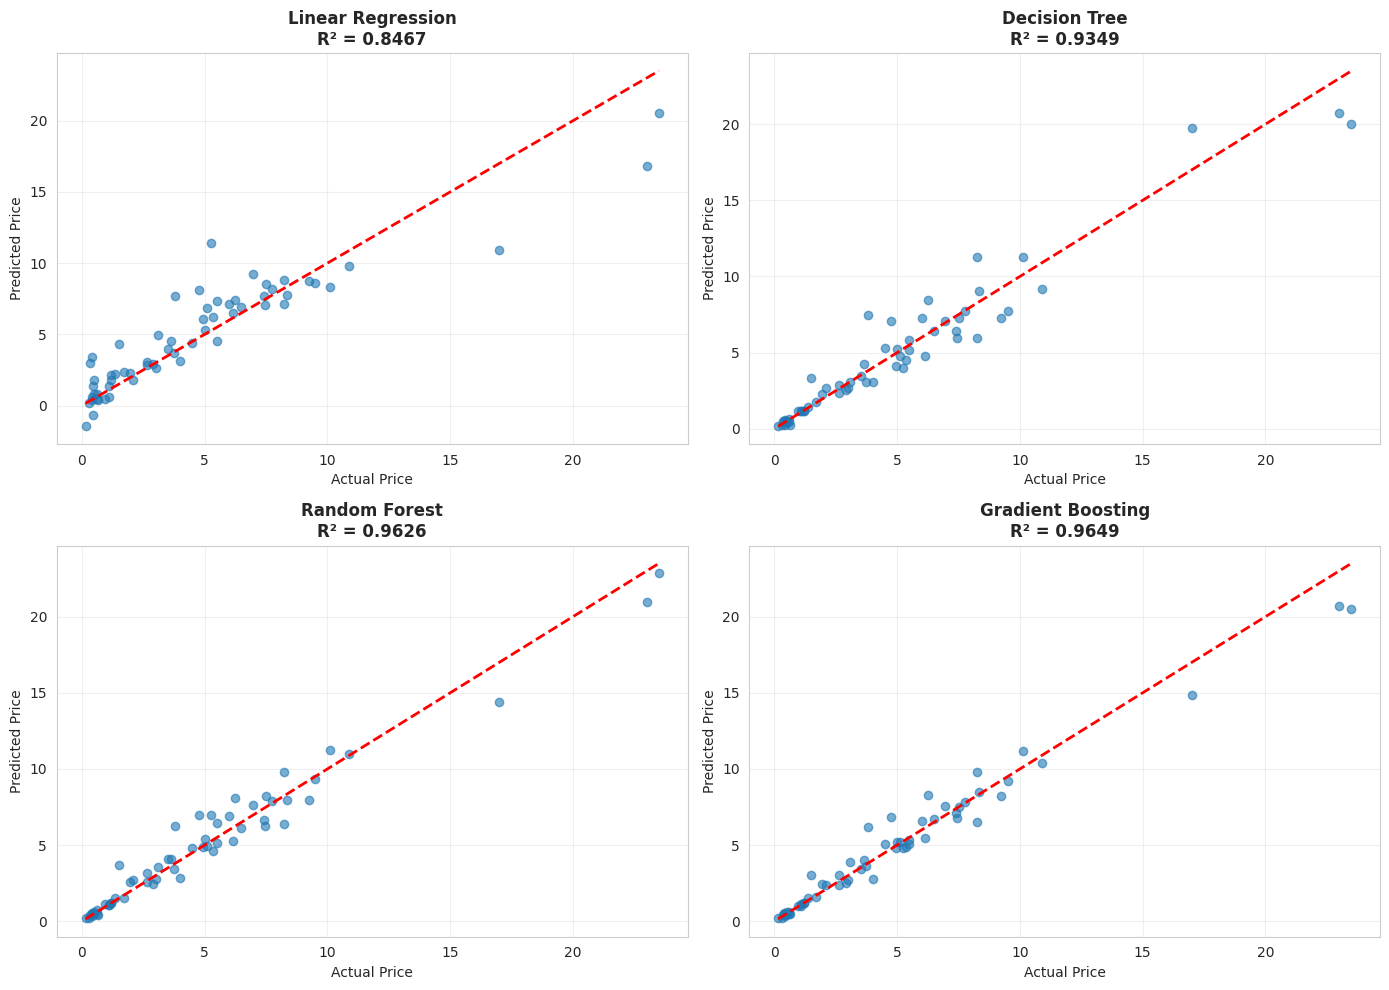

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (model_name, result) in enumerate(results.items()):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(y_test, result['predictions'], alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{model_name}\nR² = {result["r2"]:.4f}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **STEP 9: MAKE PREDICTIONS ON NEW DATA**

In [ ]:
best_predictions = results[best_model_name]['predictions']

print(f"\nSample predictions from {best_model_name}:")
sample_comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': best_predictions[:10],
    'Error': abs(y_test.values[:10] - best_predictions[:10])
})
print(sample_comparison.to_string(index=False))

print("\n" + "=" * 70)
print("✓ PROJECT COMPLETE!")
print("=" * 70)


Sample predictions from Gradient Boosting:
 Actual Price  Predicted Price    Error
         0.35         0.404223 0.054223
        10.11        11.177386 1.067386
         4.95         4.801015 0.148985
         0.15         0.237819 0.087819
         6.95         7.562401 0.612401
         7.45         6.758551 0.691449
         1.10         1.111262 0.011262
         0.50         0.588907 0.088907
         0.45         0.463473 0.013473
         6.00         6.613455 0.613455

✓ PROJECT COMPLETE!
